In [5]:
data  <- read.csv('Data_Classifications.csv', sep =';', dec ='.')

In [6]:
str(data)

'data.frame':	80 obs. of  3 variables:
 $ Distance: num  1849 1273 2133 1170 1321 ...
 $ MobPC   : num  1.537 0.638 1.532 0.863 0.714 ...
 $ Class   : int  1 1 1 1 1 1 1 1 1 1 ...


In [7]:
summary(data)

    Distance           MobPC             Class       
 Min.   :  695.5   Min.   :0.08055   Min.   :0.0000  
 1st Qu.: 1987.1   1st Qu.:0.35707   1st Qu.:0.0000  
 Median : 3875.7   Median :0.61987   Median :0.0000  
 Mean   : 4546.4   Mean   :0.79802   Mean   :0.3625  
 3rd Qu.: 6231.6   3rd Qu.:1.12888   3rd Qu.:1.0000  
 Max.   :14036.1   Max.   :2.84151   Max.   :1.0000  

In [12]:
# installing e1071 package to use Naive Bayes Classifier
install.packages('e1071', repos = 'https://cran.r-project.org/') 

also installing the dependencies ‘class’, ‘proxy’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


# Naive Bayes Classifier

In [30]:
training_data <- data[1:(nrow(data) - 5),]

In [37]:
test_data <- tail(data, 5)

In [36]:
library('e1071')

In [39]:
classifier <-  naiveBayes( Class ~ Distance + MobPC, data = training_data)

In [40]:
classifier


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        0         1 
0.6133333 0.3866667 

Conditional probabilities:
   Distance
Y       [,1]     [,2]
  0 5926.988 2974.556
  1 2305.205 2376.770

   MobPC
Y        [,1]      [,2]
  0 0.5627697 0.4102185
  1 1.1742275 0.6063639


In [41]:
# a table giving, for each target class, mean and standard deviation of the variable.
classifier$table 

0,5926.988,2974.556
1,2305.205,2376.770
0,0.5627697,0.4102185
1,1.1742275,0.6063639


In [47]:
prediction <- predict(classifier, test_data[,-3], type = 'raw')

In [48]:
prediction # table of probabilities for an object to be in a certain class


0,1
0.1075030,0.89249695
0.9770599,0.02294007
0.7447663,0.25523370
0.9419295,0.05807047
0.6485249,0.35147509


# Decision Tree Model

In [51]:
# installing rpart package to use Desicion Tree
install.packages('rpart', repos = 'https://cran.r-project.org/') 

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [52]:
library(rpart)

In [55]:
decisionTree <- rpart( Class ~ Distance + MobPC, data = training_data)

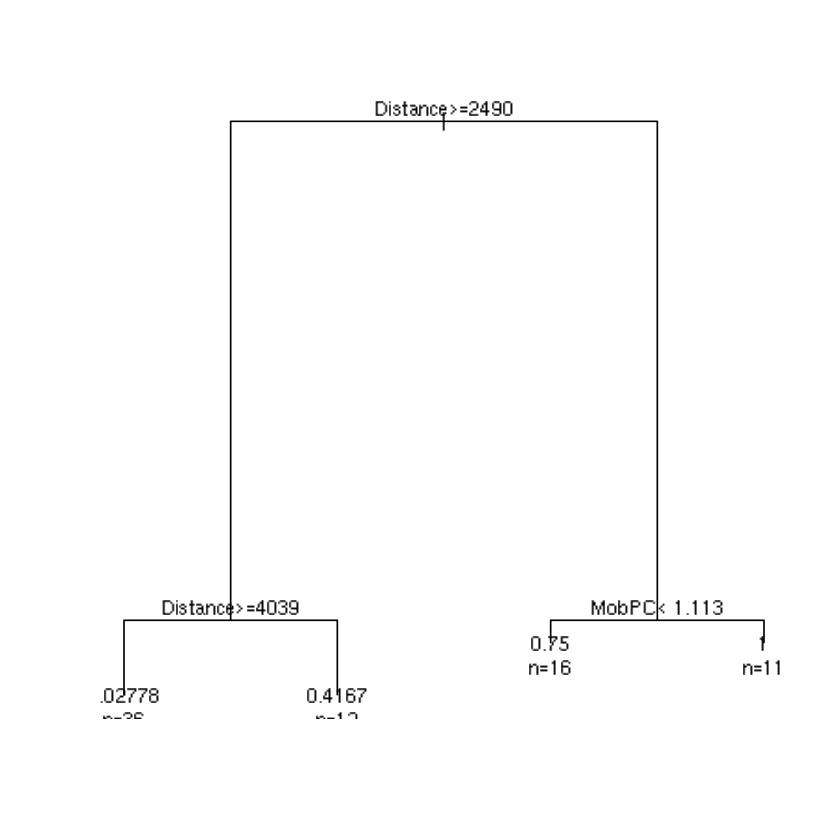

In [62]:
plot(decisionTree)
text(decisionTree, use.n = TRUE)

In [58]:
prediction1 <- predict(decisionTree, test_data[,-3])

In [59]:
prediction1

76         77         78         79         80 
1.00000000 0.02777778 0.02777778 0.02777778 0.41666667

# Generalized Linear Model (Logistic Regression)

In [63]:
# Value of parameter 'family = Binomial' specifies default 'logit' link function.
regression_model <- glm(Class ~ Distance + MobPC, data = training_data, family = binomial)

In [65]:
regression_model



Call:  glm(formula = Class ~ Distance + MobPC, family = binomial, data = training_data)

Coefficients:
(Intercept)     Distance        MobPC  
  0.3066834   -0.0007103    2.0691198  

Degrees of Freedom: 74 Total (i.e. Null);  72 Residual
Null Deviance:	    100.1 
Residual Deviance: 56.95 	AIC: 62.95

In [67]:
summary(regression_model)


Call:
glm(formula = Class ~ Distance + MobPC, family = binomial, data = training_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7938  -0.5626  -0.1530   0.5411   4.0903  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.3066834  0.8805776   0.348 0.727633    
Distance    -0.0007103  0.0002069  -3.433 0.000598 ***
MobPC        2.0691198  0.7278264   2.843 0.004471 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 100.085  on 74  degrees of freedom
Residual deviance:  56.951  on 72  degrees of freedom
AIC: 62.951

Number of Fisher Scoring iterations: 6


In [68]:
anova(regression_model)

,Df,Deviance,Resid. Df,Resid. Dev
NULL,NA,NA,74,100.08505
Distance,1,32.87649,73,67.20856
MobPC,1,10.25712,72,56.95144


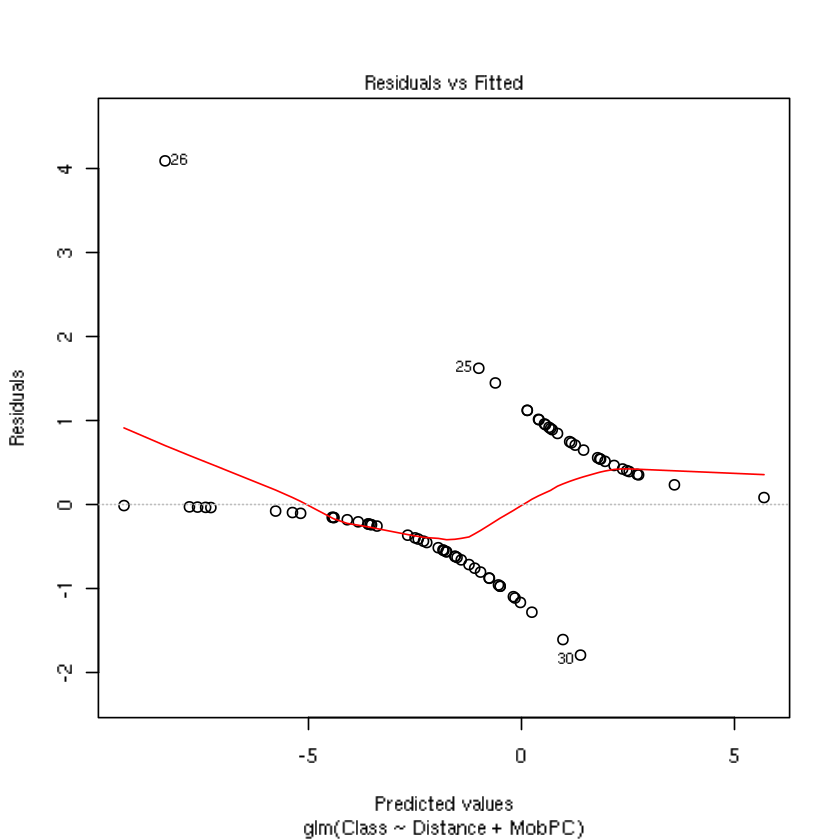

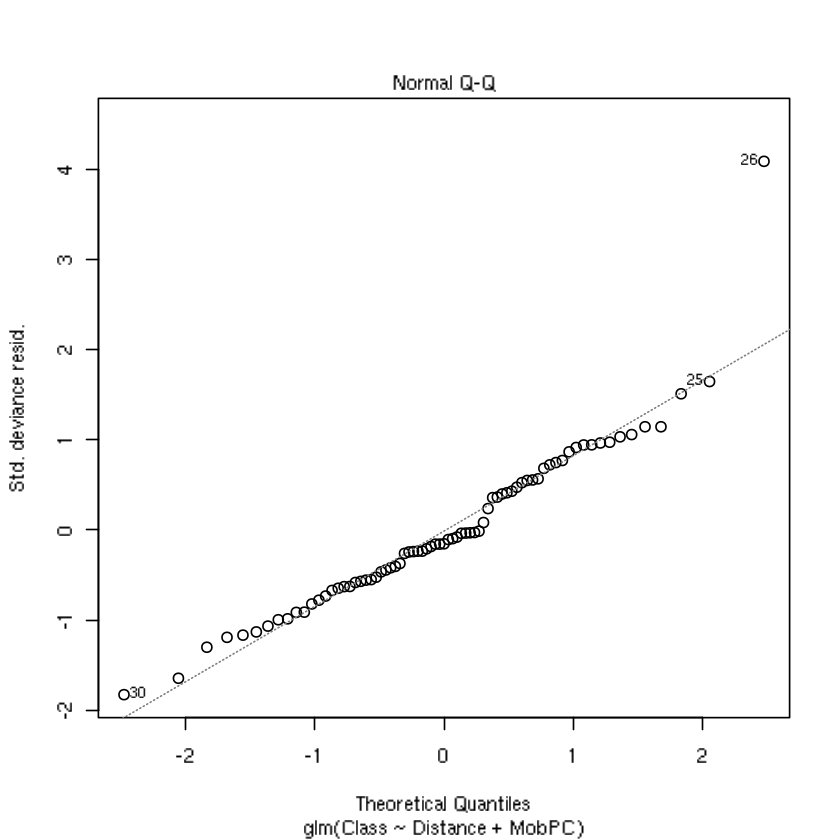

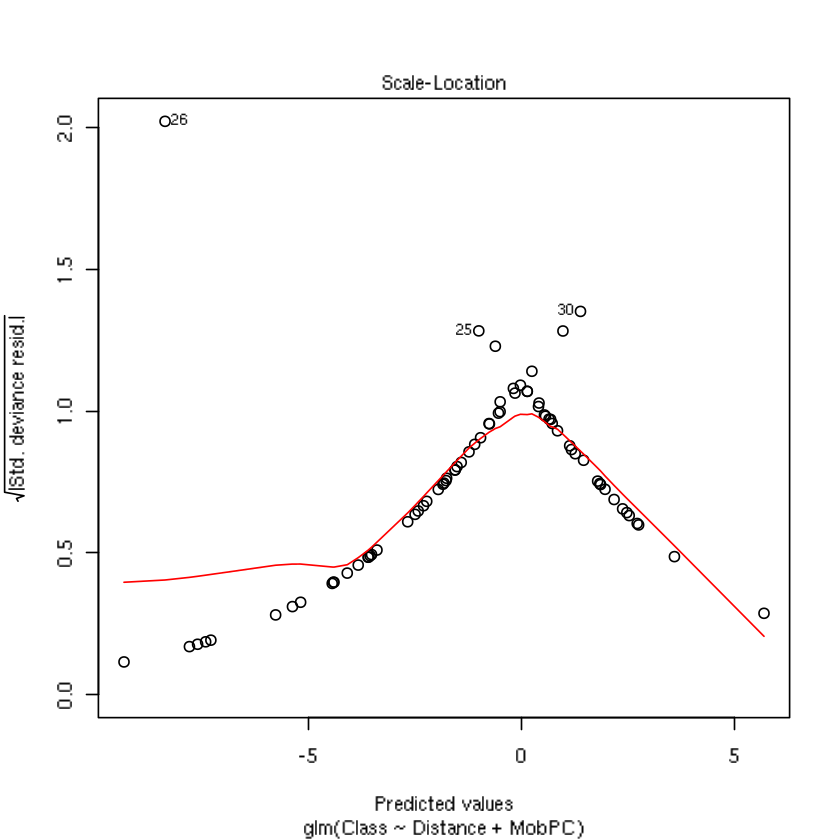

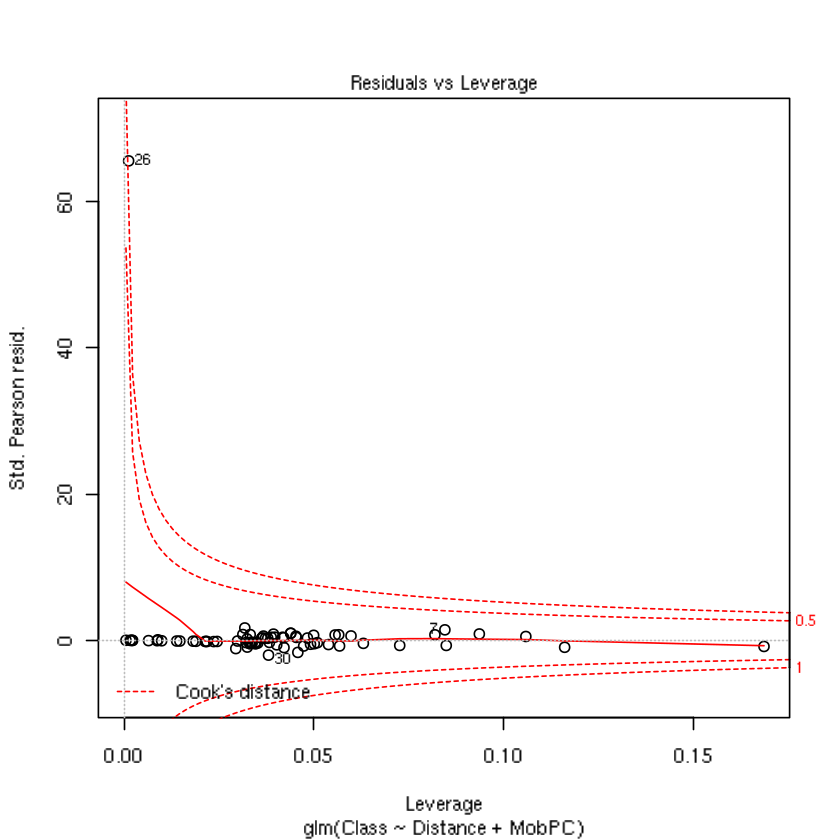

In [69]:
plot(regression_model)

In [74]:
predic_reg_logit <- predict.glm(regression_model, test_data[,-3])

In [75]:
predic_reg_logit # prediction is given in logit(log-odds)

76         77         78         79         80 
 2.0472822 -4.3179189 -1.3453185 -3.2445604 -0.7391632

In [76]:
#converting log-odds to actual probability using logit function
predic_reg <- 1/(1+exp( - predic_reg_logit ))

In [77]:
predic_reg

76         77         78         79         80 
0.88567272 0.01315230 0.20663679 0.03752285 0.32318716